#  Predicting Housing Prices for House Hunters in Ames, Iowa

##### By Argishti Ovsepyan

As a data scientist hired by the reality TV show House Hunters, my task is to create a predictive model that accurately estimates housing prices in Ames, Iowa. The show's producers want me to provide a reliable tool for couples on the show to help them make informed decisions while searching for their dream home in Ames.

For this project, I will analyze the extensive Ames Housing Dataset, which includes a wide range of features associated with residential properties in Ames. My objective is to develop a machine learning model that can accurately predict the sale prices of houses based on these features. This will assist the House Hunters participants in understanding the fair market value of the properties they encounter during their search.

### Contents:

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Visualizations](#Exploratory-Visualizations)
- [Pre-processing](#Pre-processing)
- [Modeling and Inferential Visualizations](#Modeling-and-Inferential-Visualizations)
- [Model Evaluation](#Model-Evaluation)

### Imports and Read-Ins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

## Exploratory Data Analysis

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
df_train.shape

(2051, 81)

In [6]:
df_test.shape

(878, 80)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
df_train['SalePrice'].isna().sum()

0

In [9]:
df_train.isna().sum().sort_values(ascending = False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
Sale Type            0
Full Bath            0
Half Bath            0
dtype: int64

In [10]:
df_test.isna().sum().sort_values(ascending = False).head(20)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen AbvGr       0
dtype: int64

In [11]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Upon initial inspection of the data, I conducted a thorough examination to identify any missing values that required cleaning. Additionally, I carefully reviewed the comprehensive description of the training data, enabling me to identify irregularities that could potentially indicate outliers within the provided features.

## Data Cleaning

In [12]:
df_train.columns = df_train.columns.str.lower().str.replace(' ','_')

In [13]:
df_train.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [14]:
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

In [15]:
df_test.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [16]:
def fill_num(df_train, df_test):
    for column in df_train.select_dtypes(include=[np.number]).columns:
        train_med = df_train[column].median()
        df_train[column].fillna(train_med, inplace=True)
        if column in df_test.columns:
            df_test[column].fillna(train_med, inplace=True)
    return df_train, df_test

In [17]:
df_train, df_test = fill_num(df_train, df_test)

In [18]:
df_train.drop(columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'utilities'], inplace = True)

In [19]:
df_test.drop(columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'utilities'], inplace = True)

After careful consideration, I employed a strategy to handle missing numeric values by filling them with the median. This choice was made due to the median's robustness to outliers. In addition, I identified features that exhibited missing values exceeding 50% or maintained a consistent value throughout the dataset. I decided these features were non-informative for the model and removed them.

In [20]:
df_train.isna().sum().sort_values(ascending = False).head(12)

garage_cond       114
garage_finish     114
garage_qual       114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmt_qual          55
bsmtfin_type_1     55
bsmt_cond          55
mas_vnr_type       22
kitchen_abvgr       0
bedroom_abvgr       0
dtype: int64

In [21]:
mv_train_mode = df_train['mas_vnr_type'].mode()[0]

In [22]:
df_train['mas_vnr_type'].fillna(mv_train_mode, inplace=True)
df_test['mas_vnr_type'].fillna(mv_train_mode, inplace=True)

In [23]:
nog = ['garage_cond', 'garage_finish', 'garage_qual', 'garage_type']

for g in nog:
    df_train[g].fillna('No Garage', inplace= True)
    df_test[g].fillna('No Garage', inplace = True)

In [24]:
nob = ['bsmt_exposure', 'bsmtfin_type_2', 'bsmt_qual', 'bsmtfin_type_1', 'bsmt_cond']

for b in nob:
    df_train[b].fillna('No Basement', inplace= True)
    df_test[b].fillna('No Basement', inplace = True)

In [25]:
df_train.isna().sum().sort_values(ascending = False).head()

id               0
garage_type      0
functional       0
totrms_abvgrd    0
kitchen_qual     0
dtype: int64

In [26]:
df_test.isna().sum().sort_values(ascending = False).head()

electrical        1
id                0
bsmt_half_bath    0
totrms_abvgrd     0
kitchen_qual      0
dtype: int64

It became apparent that some missing values were associated with houses lacking a garage or basement. To address this, I imputed these missing values with a new categorical value of "No Garage" or "No Basement". This was a necessary step to ensure compatibility with one-hot encoding procedures.

In [27]:
numeric = df_train[[
              'gr_liv_area', 
              'garage_area', 
              'total_bsmt_sf', 
              '1st_flr_sf', 
              'year_built', 
              'year_remod/add',
              'bsmtfin_sf_1',
              'open_porch_sf',
              'wood_deck_sf',
              'lot_area']]

In [28]:
numeric.dtypes

gr_liv_area         int64
garage_area       float64
total_bsmt_sf     float64
1st_flr_sf          int64
year_built          int64
year_remod/add      int64
bsmtfin_sf_1      float64
open_porch_sf       int64
wood_deck_sf        int64
lot_area            int64
dtype: object

In [29]:
numeric.isna().sum()

gr_liv_area       0
garage_area       0
total_bsmt_sf     0
1st_flr_sf        0
year_built        0
year_remod/add    0
bsmtfin_sf_1      0
open_porch_sf     0
wood_deck_sf      0
lot_area          0
dtype: int64

In [30]:
numeric.describe()

,gr_liv_area,garage_area,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,bsmtfin_sf_1,open_porch_sf,wood_deck_sf,lot_area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1499.330083,473.674793,1057.956850,1164.488055,1971.708922,1984.190151,442.264261,47.556802,93.833740,10065.208191
std,500.447829,215.881933,449.303265,396.446923,30.177889,21.036250,461.094540,66.747241,128.549416,6742.488909
min,334.000000,0.000000,0.000000,334.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,1300.000000
25%,1129.000000,319.000000,793.000000,879.500000,1953.500000,1964.500000,0.000000,0.000000,0.000000,7500.000000
50%,1444.000000,480.000000,994.500000,1093.000000,1974.000000,1993.000000,368.000000,27.000000,0.000000,9430.000000
75%,1728.500000,576.000000,1318.500000,1405.000000,2001.000000,2004.000000,733.500000,70.000000,168.000000,11513.500000
max,5642.000000,1418.000000,6110.000000,5095.000000,2010.000000,2010.000000,5644.000000,547.000000,1424.000000,159000.000000


In [31]:
cat = df_train[['kitchen_qual', 'land_slope', 'central_air', 'neighborhood', 'ms_subclass']]

In [32]:
cat.shape

(2051, 5)

In [33]:
cat.isna().sum()

kitchen_qual    0
land_slope      0
central_air     0
neighborhood    0
ms_subclass     0
dtype: int64

In [34]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kitchen_qual  2051 non-null   object
 1   land_slope    2051 non-null   object
 2   central_air   2051 non-null   object
 3   neighborhood  2051 non-null   object
 4   ms_subclass   2051 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


## Exploratory Visualizations

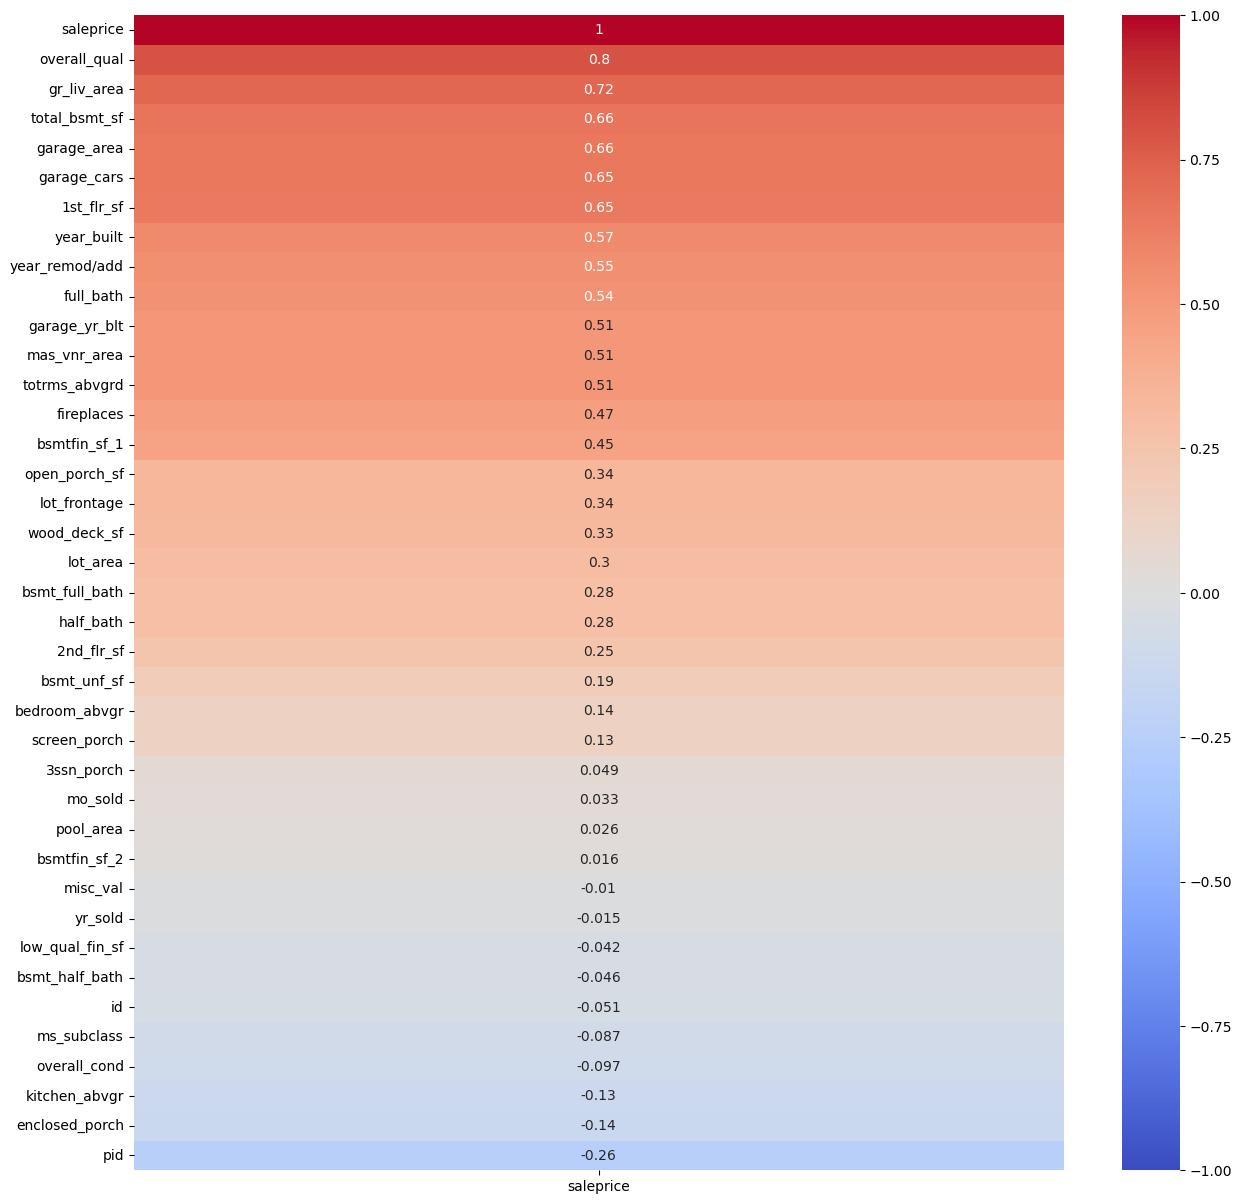

In [94]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(numeric_only = True)[['saleprice']].sort_values(by = 'saleprice', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

I selected numeric features with a correlation coefficient above 0.3, indicating strong predictive potential. The inclusion of categorical features was based on my personal preference, simulating my own search to purchase a home.

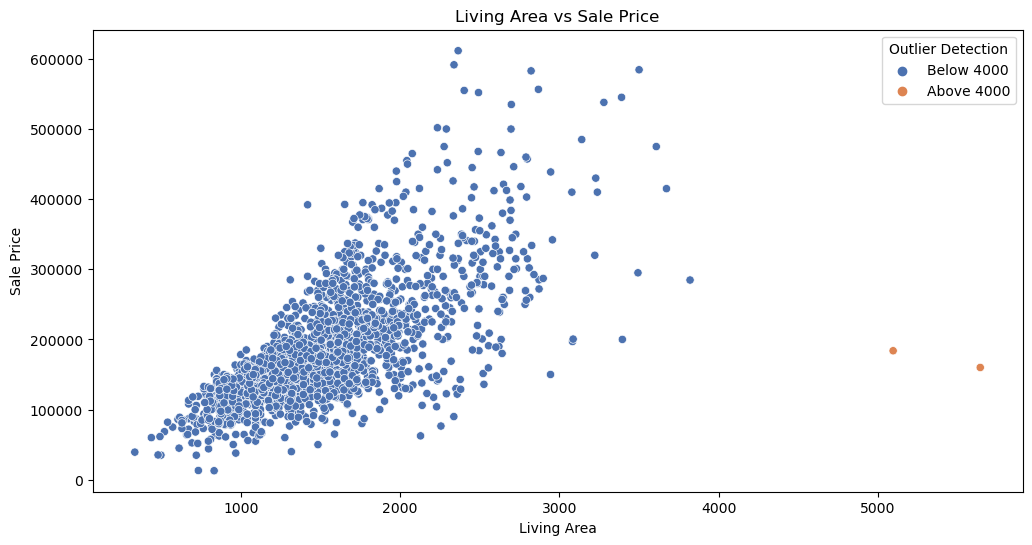

In [36]:
df_train['Outlier Detection'] = np.where(df_train['gr_liv_area'] > 4000, 'Above 4000', 'Below 4000')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='Outlier Detection', palette='deep', data=df_train)

plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.title('Living Area vs Sale Price')
plt.show()

In [37]:
df_train = df_train[df_train['gr_liv_area'] < 4000]

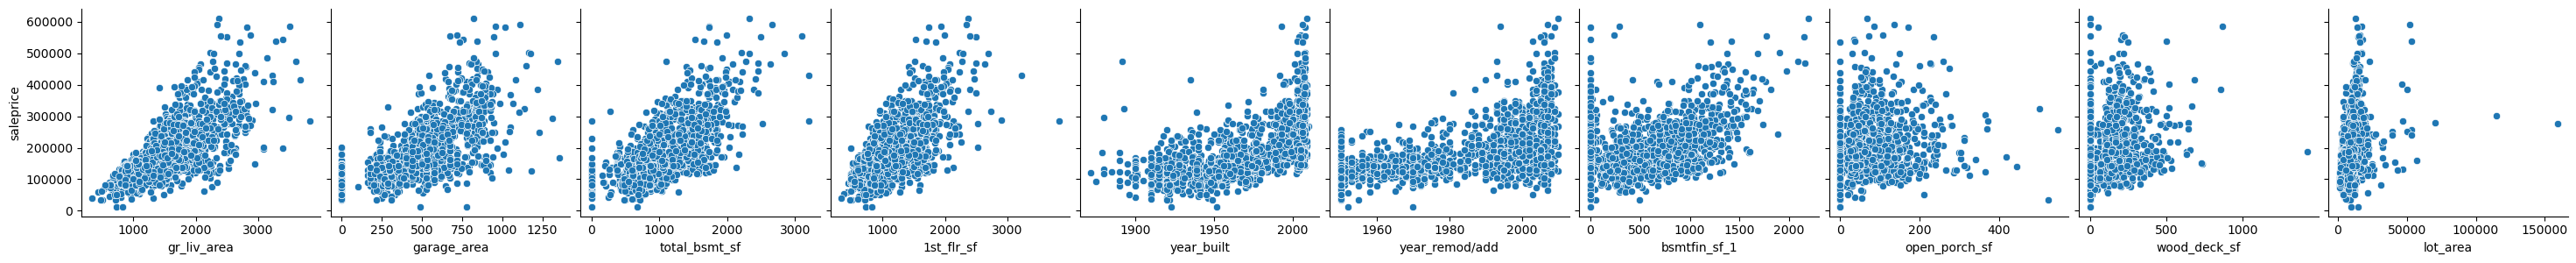

In [103]:
sns.pairplot(df_train, x_vars=numeric, y_vars='saleprice', height = 3)
plt.savefig('images/numeric_vs_saleprice_pairplot.png', dpi=300)
plt.show;

In [ ]:
[Click here to view the plot](pairplot.png)

In [39]:
df_train = df_train[df_train['garage_area'] < 1500]
df_train = df_train[df_train['open_porch_sf'] < 600]
df_train = df_train[df_train['wood_deck_sf'] < 1500]
df_train = df_train[df_train['lot_area'] < 1000000]

Using a pairplot to visualize my numeric features along with the comphrensive description, I removed what I deemed to be strong outliers.

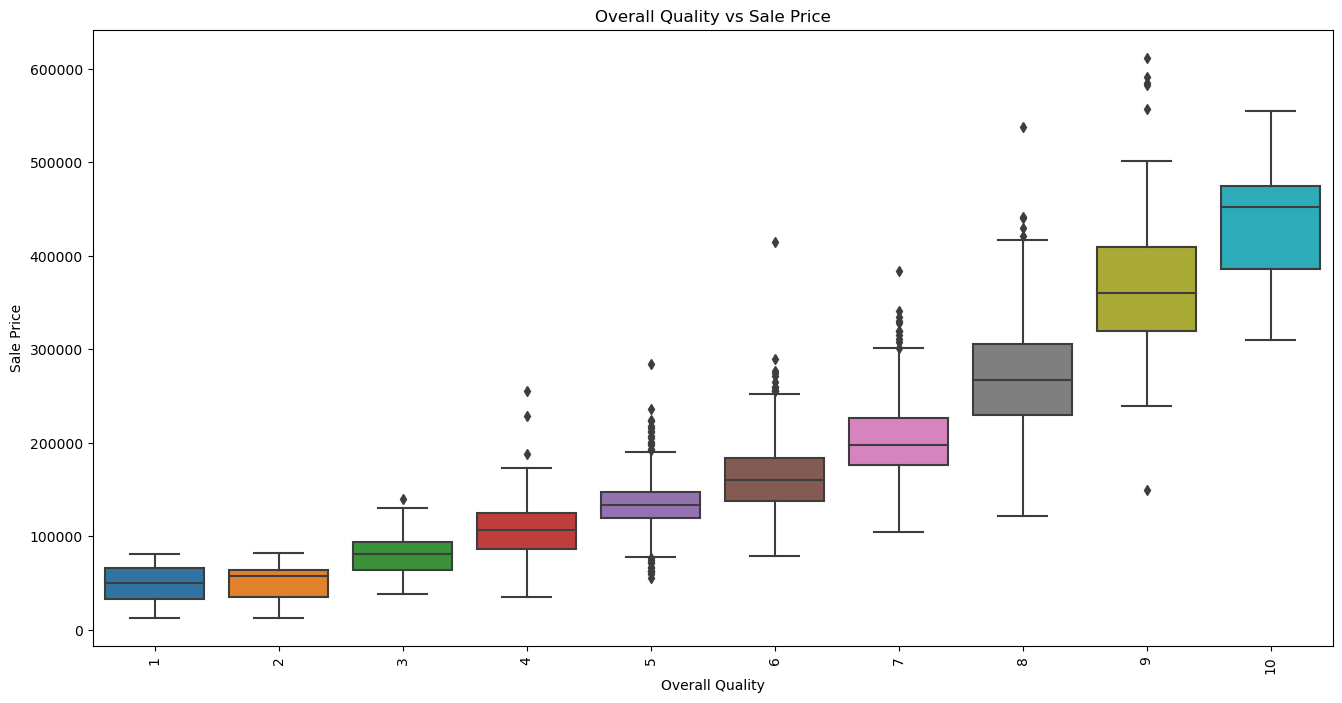

In [40]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='overall_qual', y='saleprice', data=df_train)
plt.xticks(rotation=90)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Overall Quality vs Sale Price')
plt.show()

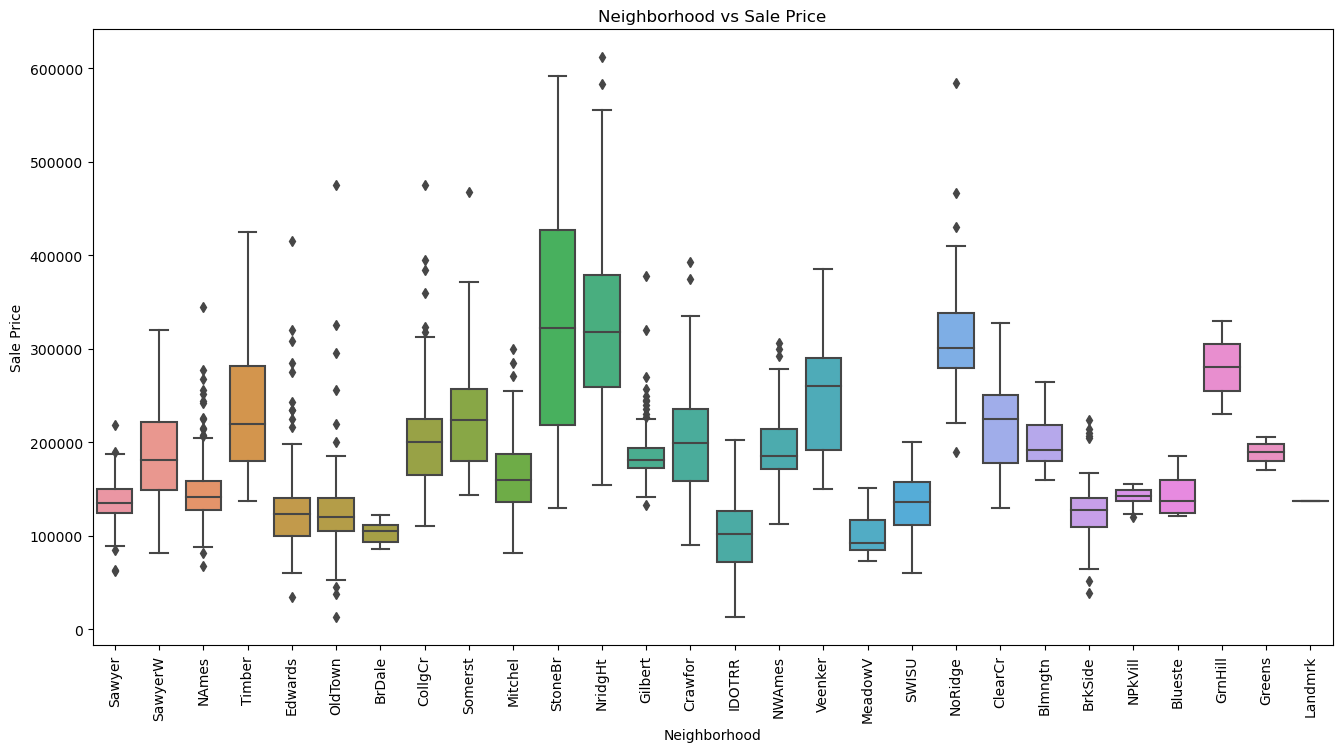

In [41]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='neighborhood', y='saleprice', data=df_train)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Neighborhood vs Sale Price')
plt.show()

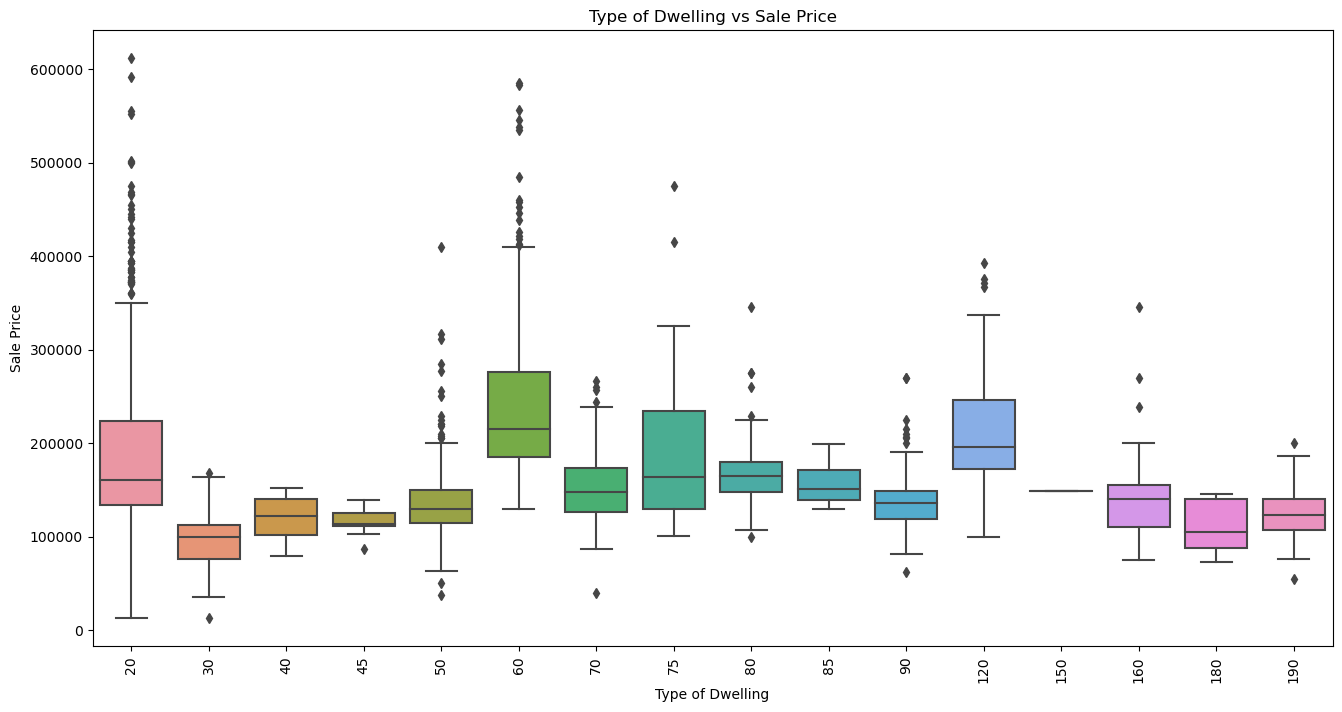

In [42]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='ms_subclass', y='saleprice', data=df_train)
plt.xticks(rotation=90)
plt.xlabel('Type of Dwelling')
plt.ylabel('Sale Price')
plt.title('Type of Dwelling vs Sale Price')
plt.show()

## Pre-processing

In [43]:
X = df_train[['overall_qual',
              'gr_liv_area', 
              'garage_area', 
              'garage_cars', 
              'total_bsmt_sf', 
              '1st_flr_sf', 
              'year_built', 
              'year_remod/add', 
              'full_bath',
              'totrms_abvgrd',
              'fireplaces',
              'bsmtfin_sf_1',
              'open_porch_sf',
              'wood_deck_sf',
              'lot_area',
              'overall_cond',
              'central_air',
              'neighborhood',
              'ms_subclass',
              'land_slope',
              'kitchen_qual',
              'mas_vnr_type',
              'garage_yr_blt',
              'half_bath'
             ]]
y = df_train['saleprice']

In [44]:
ct = ColumnTransformer([
    ('pipeline', Pipeline([
        ('sc', StandardScaler()),
        ('pf', PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False))
    ]), ['overall_qual',
         'gr_liv_area', 
         'garage_area', 
         'total_bsmt_sf', 
         '1st_flr_sf', 
         'year_built', 
         'year_remod/add', 
         'bsmtfin_sf_1',
         'open_porch_sf',
         'wood_deck_sf',
         'lot_area',
         'totrms_abvgrd',
         'garage_yr_blt']),
    ('oh', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'), 
         ['overall_cond', 
          'fireplaces', 
          'totrms_abvgrd', 
          'full_bath', 
          'garage_cars', 
          'overall_qual', 
          'kitchen_qual', 
          'land_slope', 
          'central_air', 
          'neighborhood', 
          'ms_subclass',
          'mas_vnr_type',
          'half_bath'])
])

First, I standardized the features to ensure even scaling, which is important before introducing polynomial features, as these can amplify discrepancies. After creating the polynomial features to capture potential non-linear interactions, I used one-hot encoding to convert categorical data into a numerical format to prepare them for machine learning. For certain features, like "Overall Quality" I decided they are in a gray area between numeric and categorical, and used both methods.

In [45]:
X.isna().sum()

overall_qual      0
gr_liv_area       0
garage_area       0
garage_cars       0
total_bsmt_sf     0
1st_flr_sf        0
year_built        0
year_remod/add    0
full_bath         0
totrms_abvgrd     0
fireplaces        0
bsmtfin_sf_1      0
open_porch_sf     0
wood_deck_sf      0
lot_area          0
overall_cond      0
central_air       0
neighborhood      0
ms_subclass       0
land_slope        0
kitchen_qual      0
mas_vnr_type      0
garage_yr_blt     0
half_bath         0
dtype: int64

In [46]:
X.shape

(2049, 24)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [48]:
# mean_squared_error(y_train, np.mean(y_train))

##### Baseline Price = 181486.20182291666
##### Baseline RMSE = 78602.01195

In [49]:
X_train_ct = ct.fit_transform(X_train)

In [50]:
X_test_ct = ct.transform(X_test)

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 4, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [51]:
print(X_train_ct.shape, y_train.shape)

(1536, 196) (1536,)


In [52]:
print(X_test_ct.shape, y_test.shape)

(513, 196) (513,)


## Modeling and Inferential Visualizations

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train_ct, y_train)

LinearRegression()

In [55]:
lr.score(X_train_ct, y_train)

0.9449139050926411

In [56]:
lr.score(X_test_ct, y_test)

0.9347393185068001

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)
np.mean(cross_val_score(lr, X_train_ct, y_train, cv=kf))

0.9062012595714117

In [58]:
y_preds = lr.predict(X_test_ct)

In [59]:
y_preds.shape

(513,)

In [60]:
lr.coef_

array([-1.84460982e+16,  2.51680000e+04, -5.04000000e+02,  8.52700000e+03,
       -1.66600000e+03,  1.64760000e+04,  5.07200000e+03,  6.02800000e+03,
        2.36000000e+03,  1.10400000e+03,  7.05200000e+03,  5.66800000e+03,
        1.59200000e+03, -6.35109437e+15,  1.03000000e+03,  8.54000000e+02,
        6.51600000e+03, -1.04000000e+03, -1.87200000e+03,  2.75600000e+03,
        2.09200000e+03, -2.62400000e+03, -1.62400000e+03,  1.06800000e+03,
        4.21600000e+03, -6.80000000e+01,  4.38800000e+03,  3.74000000e+02,
        4.32400000e+03, -7.30400000e+03,  2.19200000e+03, -1.80000000e+01,
        5.20000000e+02,  2.75498828e+03,  2.23250000e+03,  1.23437500e+03,
       -8.87700000e+03,  2.14275000e+03,  1.98300000e+03,  1.58100000e+03,
       -2.05800000e+03,  1.52250000e+02,  2.93500000e+02, -2.24675000e+03,
        1.64700000e+03,  8.63750000e+02, -1.74775000e+03,  1.38800000e+03,
        7.17812500e+02, -2.35100000e+03, -5.19500000e+02, -1.46250000e+01,
        1.48500000e+02,  

In [61]:
lr.intercept_

1.4613644163232374e+16

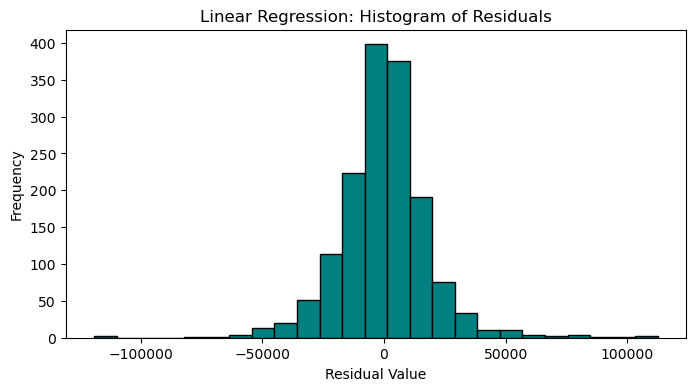

In [62]:
y_pred = lr.predict(X_train_ct)
resids = y_train - y_pred

plt.figure(figsize = (8, 4))
plt.hist(resids, bins = 25, color = 'teal', edgecolor = 'black')
plt.title('Linear Regression: Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

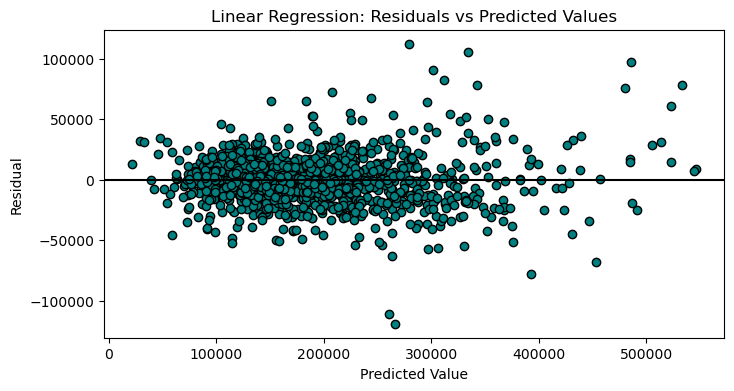

In [63]:
plt.figure(figsize = (8, 4))
plt.scatter(y_pred, resids, color = 'teal', edgecolor = 'black')
plt.axhline(0, color = 'black')
plt.title('Linear Regression: Residuals vs Predicted Values')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

In [64]:
mean_squared_error(y_test, y_preds, squared = False)

20312.200884683254

In [65]:
las = LassoCV()

In [66]:
las.fit(X_train_ct, y_train)

LassoCV()

In [67]:
las.score(X_train_ct, y_train)

0.9381691537021007

In [68]:
las.score(X_test_ct, y_test)

0.9355862704477644

In [69]:
y_preds = las.predict(X_test_ct)

In [70]:
las.coef_

array([ 20775.80171282,  21446.02472596,   4626.77220161,   8464.3406744 ,
         1844.84199879,  13488.82513979,   8399.14784534,   6083.51815071,
         1816.77274215,    921.10780702,   7938.76788661,    575.25292753,
          347.64550252,    -81.60128342,   2149.09993182,    233.07353074,
         5185.19475075,      0.        ,  -1012.4943388 ,   1114.96020525,
         1852.07017296,  -1772.05886066,  -1349.93732674,   1411.03331116,
         2092.03741662,    145.98665704,   2719.37020416,   1580.73220704,
         2355.22626041,  -3469.35100069,    847.31471341,   2492.79096461,
            0.        ,   2393.73264765,   1884.99831779,    189.28553067,
        -4255.31046739,      0.        ,     59.72161867,      0.        ,
         -979.9344575 ,    627.25360074,     65.57430733,  -1572.61459152,
         1662.39942541,    665.76915588,  -1939.23405758,    673.19427594,
         1969.1302355 ,  -1725.77894293,     -0.        ,      0.        ,
           -0.        ,  

In [71]:
las.intercept_

168274.1336774817

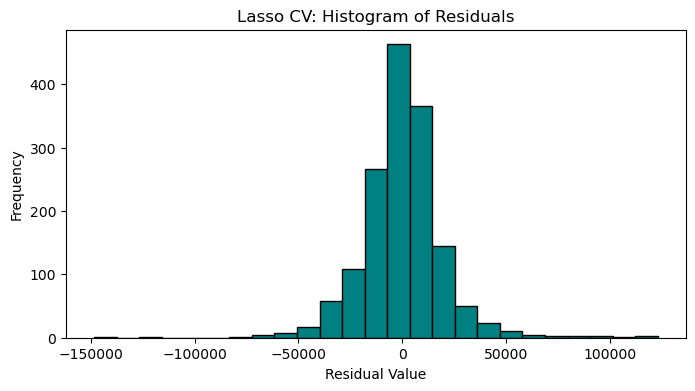

In [72]:
y_pred = las.predict(X_train_ct)
resids = y_train - y_pred

plt.figure(figsize = (8, 4))
plt.hist(resids, bins = 25, color = 'teal', edgecolor = 'black');
plt.title('Lasso CV: Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

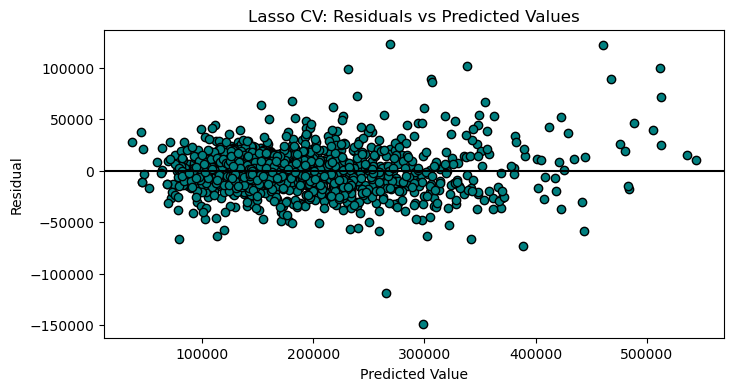

In [73]:
plt.figure(figsize = (8, 4))
plt.scatter(y_pred, resids, color = 'teal', edgecolor = 'black')
plt.axhline(0, color = 'black');
plt.title('Lasso CV: Residuals vs Predicted Values')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

In [74]:
mean_squared_error(y_test, y_preds, squared=False)

20179.964756674646

In [75]:
rid = RidgeCV()

In [76]:
rid.fit(X_train_ct, y_train)

RidgeCV()

In [77]:
y_preds = rid.predict(X_test_ct)

In [78]:
rid.intercept_

167664.2250971852

In [79]:
mean_squared_error(y_test, y_preds, squared=False)

20589.9635851725

## Model Evaluation

In [80]:
df_test_ct = ct.transform(df_test[[
              'overall_qual',
              'gr_liv_area', 
              'garage_area', 
              'garage_cars', 
              'total_bsmt_sf', 
              '1st_flr_sf', 
              'year_built', 
              'year_remod/add', 
              'full_bath',
              'totrms_abvgrd',
              'fireplaces',
              'bsmtfin_sf_1',
              'open_porch_sf',
              'wood_deck_sf',
              'lot_area',
              'overall_cond',
              'central_air',
              'neighborhood',
              'ms_subclass',
              'land_slope',
              'kitchen_qual',
              'mas_vnr_type',
              'garage_yr_blt',
              'half_bath'
]])

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [81]:
preds = las.predict(df_test_ct)

In [82]:
df_test['saleprice'] = preds

In [83]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,Inside,...,60,112,0,0,0,0,4,2006,WD,135206.416231
1,2718,905108090,90,RL,68.0,9662,Pave,IR1,Lvl,Inside,...,0,0,0,0,0,0,8,2006,WD,166699.852612
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,Inside,...,24,0,0,0,0,0,9,2006,New,199334.351971
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,Inside,...,0,184,0,0,0,0,7,2007,WD,103532.752366
4,625,535105100,20,RL,68.0,9500,Pave,IR1,Lvl,Inside,...,76,0,0,185,0,0,7,2009,WD,169177.568026


In [84]:
preds.shape

(878,)

In [85]:
las_sub10 = df_test[['id', 'saleprice']]

In [86]:
las_sub10.head()

,id,saleprice
0,2658,135206.416231
1,2718,166699.852612
2,2414,199334.351971
3,1989,103532.752366
4,625,169177.568026


In [87]:
las_sub10.shape

(878, 2)

In [88]:
las_sub10.set_index('id', inplace = True)

In [89]:
las_sub10.head()

,saleprice
id,
2658,135206.416231
2718,166699.852612
2414,199334.351971
1989,103532.752366
625,169177.568026


In [90]:
las_sub10.to_csv('datasets/final_submission_lasso.csv')